In [1]:
%reset

In [15]:
import numpy as np
import scipy.fftpack as fftpack
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from tempfile import TemporaryFile
from sklearn import svm
import cv2

clf= svm.SVC(kernel='rbf',gamma='scale')

In [16]:
age1= sio.loadmat('./age_big.mat')
path1=sio.loadmat('./path_big.mat')
data_age= age1['data_age']
data_path= path1['data_path']

459463


459463


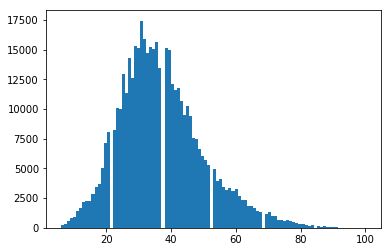

In [12]:
temp_age= data_age[0,:]
print(len(temp_age))
hist1= plt.hist(temp_age,bins=100)
new_age=[]

for i in temp_age:
    if i<20:
        new_age.append(10)
    elif i<30:
        new_age.append(25)
    elif i<40:
        new_age.append(35)
    elif i<50:
        new_age.append(45)
    elif i<70:
        new_age.append(55)
    else:
        new_age.append(85)
print(len(new_age))
        
        

459463
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
finished
10


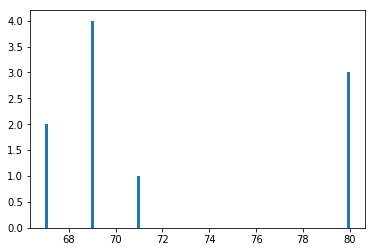

In [7]:
images=[]
age=[]
path=[]
r=0
# print(data_path[0,0])
[h,w]= data_path.shape
print(w)
for i in range(10):
    str_1= ''.join(data_path[0,i])
    str_1='./imdb_crop/'+str_1
    str_1.replace(" \ "," / ")
    
    temp_age= data_age[0,i]
    # temp_age= new_age[i]
    try:
        data=plt.imread(str_1)
        # plt.imshow(data)
        # age.append(temp_age)
        # path.append(str_1)
        
    except:
        print(str_1)
        print(i)
        continue
    img1= cv2.resize(data,(256,256))
    try:
        img= img1.reshape(256*256*3)
    except:
        continue
    images.append(img1)
    print(img1.shape)
    age.append(temp_age)
print("finished")
print(len(images))
hista=plt.hist(age,bins=100)
data_age=None
data_path=None
new_age=None



In [14]:
input_img= np.array(images)
print(input_img.shape)
in_r=input_img[:,:,:,0].reshape(-1,256,256)
in_g=input_img[:,:,:,1].reshape(-1,256,256)
in_b=input_img[:,:,:,2].reshape(-1,256,256)
# input_imgs=[in_r,in_g,in_b]
input_img= np.concatenate((in_r,in_g,in_b),axis=0)
# input_img=input_img.reshape(-1,256,256)
fft_image= fftpack.dct(input_img)
print(input_img.shape)
print(fft_image.shape)


(3551, 256, 256, 3)


(10653, 256, 256)
(10653, 256, 256)


In [20]:
len1=1
len0= len(images)
train_image=[]
test_image=[]

for i in range(len1):
    temp=(fft_image[i, :, 0:6].reshape(256,6),fft_image[i + len0,:,0:6].reshape(256,6),fft_image[i + 2 * len0,:,0:6].reshape(256,6))
    
    temp=np.concatenate(temp,axis=1)
    temp1=np.array(temp)
    print(temp1.shape)
    train_image.append(temp)
    
#for i in range(len1,len0):

#    temp=(fft_image[i, :, 0:6].reshape(256,6),fft_image[i + len0,:,0:6].reshape(256,6),fft_image[i + 2 * len0,:,0:6].reshape(256,6))
    
#    temp=np.concatenate(temp,axis=1)
#    test_image.append(temp)
#train_image=np.array(train_image)
#test_image=np.array(test_image)
#train_image= train_image.reshape(-1,256*18)
#test_image=test_image.reshape(-1,256*18)
#print(train_image.shape)


(256, 18)


In [16]:
ica40= FastICA(n_components=40,max_iter=600)
train_out= ica40.fit_transform(train_image)
print(train_out.shape)



(2000, 40)


In [17]:
test_out=ica40.transform(test_image)
print(test_out.shape)



(1551, 40)


In [18]:
len2= train_image.shape[0]
# lables= age
# lables.extend(age)
# lables.extend(age)

age_train=age[:len2]
age_test= age[len2:]
print(len(age_train))


2000


In [19]:
#clf= svm.SVC(kernel='rbf')
clf.fit(train_out,age_train)
z= clf.predict(test_out)


/home/carni7vore/anaconda3/envs/Pyhton3_7/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.2695035460992908
0.43133462282398455
0.5776918117343649


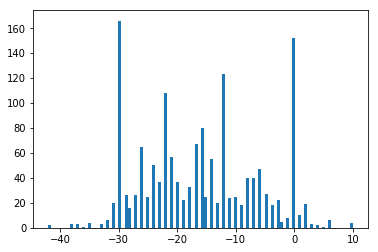

In [20]:
y_test= np.asanyarray(age_test)
count=0
diff=[]
for i in range(len(z)):
    temp= int(z[i])- int(y_test[i])
    diff.append(temp)
plt.hist(diff,bins=100)
collect_1= [i for i in diff if abs(i)<10]
collect_2= [i for i in diff if abs(i)<15]
collect_3= [i for i in diff if abs(i)<20]
print(len(collect_1)/len(test_image))
print(len(collect_2)/len(test_image))
print(len(collect_3)/len(test_image))

In [30]:
train_ptr=0
train_length=2000

for j in range(50):
    images=[]
    age=[]
    path=[]
    train_ptr= train_ptr+ train_length
    for i in range(train_ptr,train_ptr+train_length):
        str_1= ''.join(data_path[0,i])
        str_1='./imdb_crop/'+str_1
        str_1.replace(" \ "," / ")
        
        temp_age= data_age[0,i]
        # temp_age= new_age[i]
        data=plt.imread(str_1)
        
        img1= cv2.resize(data,(256,256))
        #try:
        #    img= img1.reshape(256*256*3)
        #except:
        #    continue
        if img1.shape== (256,256,3):
            images.append(img1)
            age.append(temp_age)
        #print(len(images))    
    print("finished %d" % j)
    len1=500
    
    train_image=[]
    test_image=[]
    input_img= np.array(images)

    in_r=input_img[:,:,:,0].reshape(-1,256,256)
    in_g=input_img[:,:,:,1].reshape(-1,256,256)
    in_b=input_img[:,:,:,2].reshape(-1,256,256)
    # input_imgs=[in_r,in_g,in_b]
    input_img= np.concatenate((in_r,in_g,in_b),axis=0)
    # input_img=input_img.reshape(-1,256,256)
    fft_image= fftpack.dct(input_img)
    len0= len(images)
    #print(input_img.shape)
    #print(fft_image.shape)
    for i in range(len1):
        temp=(fft_image[i, :, 0:6].reshape(256,6),fft_image[i + len0,:,0:6].reshape(256,6),fft_image[i + 2 * len0,:,0:6].reshape(256,6))
        
        temp=np.concatenate(temp,axis=1)
        train_image.append(temp)
        
    for i in range(len1,len0):
        temp=(fft_image[i, :, 0:6].reshape(256,6),fft_image[i + len0,:,0:6].reshape(256,6),fft_image[i + 2 * len0,:,0:6].reshape(256,6))
        
        temp=np.concatenate(temp,axis=1)
        test_image.append(temp)
    train_image=np.array(train_image)
    test_image=np.array(test_image)
    train_image= train_image.reshape(-1,256*18)
    test_image=test_image.reshape(-1,256*18)
    
    ica40= FastICA(n_components=40,max_iter=600)
    train_out= ica40.fit_transform(train_image)
    test_out=ica40.transform(test_image)
    
    age_train=age[:len1]
    age_test= age[len1:]
    
    clf.fit(train_out,age_train)
    z= clf.predict(test_out)
    
    y_test= np.asanyarray(age_test)
    count=0
    diff=[]
    for i in range(len(z)):
        temp= int(z[i])- int(y_test[i])
        diff.append(temp)
    # plt.hist(diff,bins=100)
    collect_0= [i for i in diff if abs(i)<5]
    collect_1= [i for i in diff if abs(i)<10]
    collect_2= [i for i in diff if abs(i)<15]
    collect_3= [i for i in diff if abs(i)<20]
    
    print(len(collect_0)/len(test_image))
    print(len(collect_1)/len(test_image))
    print(len(collect_2)/len(test_image))
    print(len(collect_3)/len(test_image))



finished 0


0.32269760696156635
0.5467730239303843
0.6700507614213198
0.9093546047860769


finished 1


0.13381995133819952
0.2635847526358475
0.42173560421735606
0.5150040551500406


finished 2


0.4061302681992337
0.7003831417624521
0.8436781609195402
0.9287356321839081


finished 3


0.2919254658385093
0.547360248447205
0.8913043478260869
0.9386645962732919


finished 4


0.2944649446494465
0.5011070110701107
0.640590405904059
0.7933579335793358


finished 5


0.005279034690799397
0.010558069381598794
0.01885369532428356
0.05052790346907994


finished 6


0.2175543885971493
0.3360840210052513
0.6294073518379595
0.722430607651913


finished 7


0.2247191011235955
0.40749063670411984
0.5970037453183521
0.6883895131086142


finished 8


0.17429022082018927
0.3359621451104101
0.6829652996845426
0.8541009463722398


finished 9


0.21816770186335405
0.4782608695652174
0.5822981366459627
0.7057453416149069


finished 10


0.4483007953723789
0.7563268257411424
0.8994938539407086
0.9486623282718727


finished 11


0.22855029585798817
0.4933431952662722
0.6841715976331361
0.7418639053254438


finished 12


0.12841328413284134
0.2767527675276753
0.529889298892989
0.6863468634686347


finished 13


0.17911585365853658
0.28810975609756095
0.4763719512195122
0.635670731707317


finished 14


0.2754777070063694
0.5461783439490446
0.6982484076433121
0.8160828025477707


finished 15


0.0
0.0
0.0
0.005529225908372828


finished 16


0.21547799696509864
0.44613050075872535
0.644916540212443
0.7534142640364189


finished 17


0.2054176072234763
0.46952595936794583
0.7366440933032355
0.8171557562076749


finished 18


0.4348148148148148
0.6688888888888889
0.797037037037037
0.8703703703703703


finished 19


0.27651217596229377
0.43597800471327575
0.6834249803613511
0.7635506677140613


finished 20


0.1846743295019157
0.6528735632183909
0.8796934865900383
0.9777777777777777


finished 21


0.21068702290076335
0.41374045801526715
0.5564885496183206
0.6709923664122137


finished 22


0.3407821229050279
0.5506783719074222
0.7270550678371908
0.8347964884277733


finished 23


0.2391952309985097
0.42995529061102833
0.669150521609538
0.8599105812220567


finished 24


0.023203592814371257
0.04640718562874251
0.31511976047904194
0.6654191616766467


finished 25


0.09018987341772151
0.2879746835443038
0.41139240506329117
0.5348101265822784


finished 26


0.3942148760330578
0.6743801652892562
0.7942148760330578
0.9016528925619834


finished 27


0.26578073089701
0.47674418604651164
0.7358803986710963
0.8621262458471761


finished 28


0.14037735849056604
0.3192452830188679
0.4528301886792453
0.6732075471698113


finished 29


0.13311421528348397
0.23746918652423993
0.41659819227608874
0.5291700903861956


finished 30


0.28209069946195237
0.48424289008455035
0.7071483474250576
0.8055342044581092


finished 31


0.31666666666666665
0.6039682539682539
0.7293650793650793
0.8611111111111112


finished 32


0.11659919028340081
0.2931174089068826
0.4404858299595142
0.7117408906882591


finished 33


0.5003921568627451
0.8227450980392157
0.9145098039215687
0.9411764705882353


finished 34


0.19634340222575516
0.4682034976152623
0.7980922098569158
0.9141494435612083


finished 35


0.14606741573033707
0.4478330658105939
0.6508828250401284
0.8579454253611557


finished 36


0.25059101654846333
0.5003940110323088
0.6926713947990544
0.8455476753349094


finished 37


0.36577708006279436
0.6059654631083202
0.8673469387755102
0.9536891679748822


finished 38


0.21739130434782608
0.3778656126482213
0.7628458498023716
0.9217391304347826


finished 39


0.30615384615384617
0.5192307692307693
0.6023076923076923
0.6446153846153846


finished 40


0.24593796159527326
0.6846381093057607
0.8212703101920237
0.9298375184638109


finished 41


0.17049960348929422
0.47026169706582077
0.7192704203013481
0.8778747026169706


finished 42


0.25806451612903225
0.45314900153609833
0.6067588325652842
0.7503840245775729


finished 43


/home/carni7vore/anaconda3/envs/Pyhton3_7/lib/python3.6/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


0.29977289931869794
0.5177895533686601
0.79333838001514
0.9114307342922029


finished 44


0.1558846453624318
0.3858144972720187
0.603273577552611
0.7420109119251753


finished 45


0.27364341085271315
0.5875968992248062
0.8364341085271317
0.913953488372093


finished 46


0.25972120322817316
0.6485693323550991
0.8085106382978723
0.8796771826852531


finished 47


0.15261958997722094
0.38648443432042523
0.8033409263477601
0.8845861807137434


finished 48


0.3974164133738602
0.6557750759878419
0.7659574468085106
0.8199088145896657


finished 49


0.27099841521394613
0.46909667194928684
0.652931854199683
0.7741679873217115


/home/carni7vore/anaconda3/envs/Pyhton3_7/lib/python3.6/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


(3, 256, 256)
(1, 4608)
predict age 50
real age 42


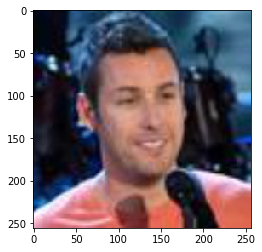

In [29]:
#predict

index= 100000
path= data_path[0,index]
age= data_age[0,index]
str_1= ''.join(path)
str_1='./imdb_crop/'+str_1
str_1.replace(" \ "," / ")

data=plt.imread(str_1)
        
img1= cv2.resize(data,(256,256))
plt.imshow(img1)

input_img=np.array(img1)
in_r=input_img[:,:,0].reshape(-1,256,256)
in_g=input_img[:,:,1].reshape(-1,256,256)
in_b=input_img[:,:,2].reshape(-1,256,256)
#input_imgs=[in_r,in_g,in_b]
input_img= np.concatenate((in_r,in_g,in_b),axis=0)
fft_image= fftpack.dct(input_img)
print(fft_image.shape)
temp=(fft_image[0, :, 0:6].reshape(256,6),fft_image[1,:,0:6].reshape(256,6),fft_image[2,:,0:6].reshape(256,6))
        
temp=np.concatenate(temp,axis=1)
temp1=np.array(temp)
temp1=temp1.reshape(1,256*18)
print(temp1.shape)

img_out= ica40.transform(temp1)
z= clf.predict(img_out)
print("predict age %d" % z)
print("real age %d" % age)